In [1]:
#pip install pandas scikit-learn xgboost tensorflow keras flask fastapi imbalanced-learn matplotlib seaborn pyspark apache-kafka

ERROR: Could not find a version that satisfies the requirement apache-kafka (from versions: none)
ERROR: No matching distribution found for apache-kafka



     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     --------------------------------------- 2.1/317.3 MB 11.8 MB/s eta 0:00:27
      -------------------------------------- 5.2/317.3 MB 12.8 MB/s eta 0:00:25
     - ------------------------------------- 9.4/317.3 MB 15.1 MB/s eta 0:00:21
     - ------------------------------------ 14.9/317.3 MB 17.4 MB/s eta 0:00:18
     -- ----------------------------------- 19.9/317.3 MB 18.5 MB/s eta 0:00:17
     -- ----------------------------------- 24.1/317.3 MB 18.6 MB/s eta 0:00:16
     --- ---------------------------------- 28.8/317.3 MB 19.3 MB/s eta 0:00:15
     ---- --------------------------------- 34.3/317.3 MB 19.8 MB/s eta 0:00:15
     ---- --------------------------------- 39.8/317.3 MB 20.4 MB/s eta 0:00:14
     ----- -------------------------------- 44.8/317.3 MB 21.0 MB/s eta 0:00:13
     ----- -------------------------------- 50.1/317.3 MB 21.0 MB/s eta 0:00:13
     ------ ------------------------------- 55

In [3]:
#pip install faker


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -------------------------------------- - 1.8/1.9 MB 14.4 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 11.5 MB/s eta 0:00:00


In [16]:
#pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 9.5 MB/s eta 0:00:00


In [28]:
#pip install numpy==2.0

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ----- ---------------------------------- 2.4/16.2 MB 13.4 MB/s eta 0:00:02
   ------------- -------------------------- 5.5/16.2 MB 14.6 MB/s eta 0:00:01
   ----------------------- ---------------- 9.4/16.2 MB 16.3 MB/s eta 0:00:01
   ---------------------------------- ----- 13.9/16.2 MB 17.8 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


In [26]:
#pip install shap

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -------------------------------------- - 2.6/2.7 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   -------- ------------------------------- 3.4/15.6 MB 16.7 MB/s eta 0:00:01
   ---------------- ----------------------- 6.6/15.6 MB 16.8 MB/s eta 0:00:01
   -------------------------- ------------- 10.5/15.6 MB 17.7 MB/s eta 0:00:01
   -------------------------------------- - 15.2/15.6 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------- 15.6/15.6 MB 16.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ------- -------------------------------- 5.0/28.1 MB 25.1 MB/s eta 0:00:01
   -------------- ------------------------- 10.0/28.1 MB 24.8 MB/s eta 0:00:01
   --------------------- ------------------ 14.9/28.1 MB 24.7 MB/s eta 0:00:01
   -----

  You can safely remove it manually.
  You can safely remove it manually.


In [9]:
#pip install imbalanced-learn


  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)


In [8]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
import shap

In [10]:
fake = Faker()
num_rows = 50000

# Generate random data
data = {
    "Transaction_ID": [fake.uuid4() for _ in range(num_rows)],
    "Transaction_amount": [round(fake.pyfloat(left_digits=3, right_digits=2, positive=True, min_value=0.01), 2) for _ in range(num_rows)],
    "Merchant_ID": [fake.ein() for _ in range(num_rows)],  # Employer Identification Number
    "Device_ID": [fake.uuid4() for _ in range(num_rows)],
    "User_ID": [fake.uuid4() for _ in range(num_rows)],
    "Location_data": [fake.local_latlng(country_code='US', coords_only=True) for _ in range(num_rows)],
    "Time_of_transaction": [(datetime.now() - timedelta(days=np.random.randint(1, 365))).strftime('%Y-%m-%d %H:%M:%S') for _ in range(num_rows)],
    "Previous_transactions": [np.random.randint(0, 10) for _ in range(num_rows)],  # Number of previous transactions
    "Cardholder_behavior_history": [fake.text(max_nb_chars=200) for _ in range(num_rows)],
    "Transaction_Type": [np.random.choice(['online', 'in-store', 'phone']) for _ in range(num_rows)],
    "Merchant_Category_Code": [np.random.choice(['5411', '5999', '5912', '4812', '5812']) for _ in range(num_rows)],  # example MCC codes
    "Card_Type": [np.random.choice(['credit', 'debit', 'prepaid']) for _ in range(num_rows)],
    "Transaction_Status": [np.random.choice(['approved', 'declined', 'pending']) for _ in range(num_rows)],
    "Fraud_Label": [np.random.choice([True, False]) for _ in range(num_rows)],
    "Cardholder_Age": [np.random.randint(18, 80) for _ in range(num_rows)],
    "Cardholder_Gender": [np.random.choice(['male', 'female', 'other']) for _ in range(num_rows)],
    "Cardholder_Income_Level": [np.random.choice(['low', 'medium', 'high']) for _ in range(num_rows)],
    "Merchant_Location": [fake.city() for _ in range(num_rows)],
    "Card_Issuing_Bank": [fake.company() for _ in range(num_rows)],
    "Card_Expiry_Date": [fake.credit_card_expire() for _ in range(num_rows)],
    "Transaction_Description": [fake.text(max_nb_chars=100) for _ in range(num_rows)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("credit_card_fraud_dataset.csv", index=False)

print("Dataset created and saved to credit_card_fraud_dataset.csv")


Dataset created and saved to credit_card_fraud_dataset.csv


In [11]:
data = pd.read_csv('credit_card_fraud_dataset.csv')
df.head()

,Transaction_ID,Transaction_amount,Merchant_ID,Device_ID,User_ID,Location_data,Time_of_transaction,Previous_transactions,Cardholder_behavior_history,Transaction_Type,...,Card_Type,Transaction_Status,Fraud_Label,Cardholder_Age,Cardholder_Gender,Cardholder_Income_Level,Merchant_Location,Card_Issuing_Bank,Card_Expiry_Date,Transaction_Description
0,e473e15e-ac31-41ab-87cb-06e2a6c2055f,401.72,25-3027405,83a27782-d0cd-4f4f-be82-221927b34b14,96d7cea3-05d7-4de7-9ca3-55d3fb6f4782,"(36.02506, -86.77917)",2024-04-23 04:01:10,8,We industry pressure. Will region attention en...,online,...,prepaid,declined,True,19,female,medium,Arthurfort,"Garner, Stevens and Baker",10/28,Stage born identify next myself. Candidate cle...
1,3ae162c9-57aa-4255-9a8d-949a42a5f097,808.17,51-6353765,babecc33-9ffa-49e6-b58f-0322a7682804,f507bd9e-ad6b-4ebd-aa60-cf26bbf0bb24,"(41.24255, -82.61573)",2024-05-03 04:01:10,0,Country human candidate foreign factor truth. ...,online,...,debit,pending,False,34,female,low,Blackwellville,Powers PLC,08/28,Its door stock. Alone sure world model former.
2,55c5029b-b45e-4f35-97e7-56ecda20a2db,700.33,54-3197743,5d26f23f-7d7e-4610-907b-04252f756dee,339d2d50-b126-4c50-bacc-3f94d1d3a017,"(35.88264, -80.08199)",2024-10-10 04:01:10,9,Sort floor skin lawyer statement. Best enough ...,online,...,debit,approved,False,48,male,high,New Theresaview,"Nunez, Thompson and Harper",10/28,Almost really they practice. Form win usually ...
3,510e850b-7abd-4c39-b694-a74094d8c907,16.00,03-2717730,bf7cb080-843f-42e7-8ae9-01eb9c93a9ed,712628bb-121a-4875-8f4c-36f30ab2ed17,"(38.70734, -77.02303)",2024-09-18 04:01:10,7,School compare economic together sort model. S...,online,...,debit,pending,False,72,male,medium,South Jeffreyberg,Martinez and Sons,08/33,Worker word reason operation budget sport. Act...
4,4a77bb17-c83d-418e-a121-7fcdec613c6d,253.55,21-9243305,c8d67f76-8c68-47c1-8508-fbba4c0de193,619a8b6c-a171-498f-8bde-edf83cac855a,"(41.9001, -71.08977)",2024-06-12 04:01:10,5,Hotel Mrs across in relate standard. Could fie...,online,...,credit,declined,False,46,female,low,Maryfort,Hines-Stevenson,12/25,Program through white movement myself social. ...


In [12]:
print(data.isnull().sum())

Transaction_ID                 0
Transaction_amount             0
Merchant_ID                    0
Device_ID                      0
User_ID                        0
Location_data                  0
Time_of_transaction            0
Previous_transactions          0
Cardholder_behavior_history    0
Transaction_Type               0
Merchant_Category_Code         0
Card_Type                      0
Transaction_Status             0
Fraud_Label                    0
Cardholder_Age                 0
Cardholder_Gender              0
Cardholder_Income_Level        0
Merchant_Location              0
Card_Issuing_Bank              0
Card_Expiry_Date               0
Transaction_Description        0
dtype: int64


In [13]:
# Handle categorical variables by encoding them (one-hot encoding or label encoding)
label_encoder = LabelEncoder()

# Encode categorical columns: 'Transaction_Type', 'Merchant_Category_Code', 'Card_Type', 'Transaction_Status', 'Cardholder_Gender', 'Cardholder_Income_Level'
df['Transaction_Type'] = label_encoder.fit_transform(df['Transaction_Type'])
df['Merchant_Category_Code'] = label_encoder.fit_transform(df['Merchant_Category_Code'])
df['Card_Type'] = label_encoder.fit_transform(df['Card_Type'])
df['Transaction_Status'] = label_encoder.fit_transform(df['Transaction_Status'])
df['Cardholder_Gender'] = label_encoder.fit_transform(df['Cardholder_Gender'])
df['Cardholder_Income_Level'] = label_encoder.fit_transform(df['Cardholder_Income_Level'])

# Encode Merchant_Location and Card_Issuing_Bank (either using LabelEncoder or OneHotEncoder)
df['Merchant_Location'] = label_encoder.fit_transform(df['Merchant_Location'])
df['Card_Issuing_Bank'] = label_encoder.fit_transform(df['Card_Issuing_Bank'])

# Feature Engineering: Extract date-related features from 'Time_of_transaction'
df['Time_of_transaction'] = pd.to_datetime(df['Time_of_transaction'])
df['Hour_of_day'] = df['Time_of_transaction'].dt.hour
df['Day_of_week'] = df['Time_of_transaction'].dt.dayofweek

# Remove irrelevant or text-based features for machine learning models
df = df.drop(columns=['Transaction_ID', 'Merchant_ID', 'Device_ID', 'User_ID', 'Location_data', 'Time_of_transaction', 'Cardholder_behavior_history', 'Card_Expiry_Date', 'Transaction_Description'])

# Split the data into features (X) and target (y)
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Model Evaluation:")
print(classification_report(y_test, y_pred_lgb))

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))


[LightGBM] [Info] Number of positive: 20137, number of negative: 19863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503425 -> initscore=0.013700
[LightGBM] [Info] Start training from score 0.013700
LightGBM Model Evaluation:
              precision    recall  f1-score   support

       False       0.51      0.49      0.50      4969
        True       0.51      0.53      0.52      5031

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

Random Forest Model Evaluation:
              precision    recall  f1-score   support

    

In [14]:


# Train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Model Evaluation:")
print(classification_report(y_test, y_pred_lgb))

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))


[LightGBM] [Info] Number of positive: 20137, number of negative: 19863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503425 -> initscore=0.013700
[LightGBM] [Info] Start training from score 0.013700
LightGBM Model Evaluation:
              precision    recall  f1-score   support

       False       0.51      0.49      0.50      4969
        True       0.51      0.53      0.52      5031

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

Random Forest Model Evaluation:
              precision    recall  f1-score   support

    

E:\ANACONDA\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


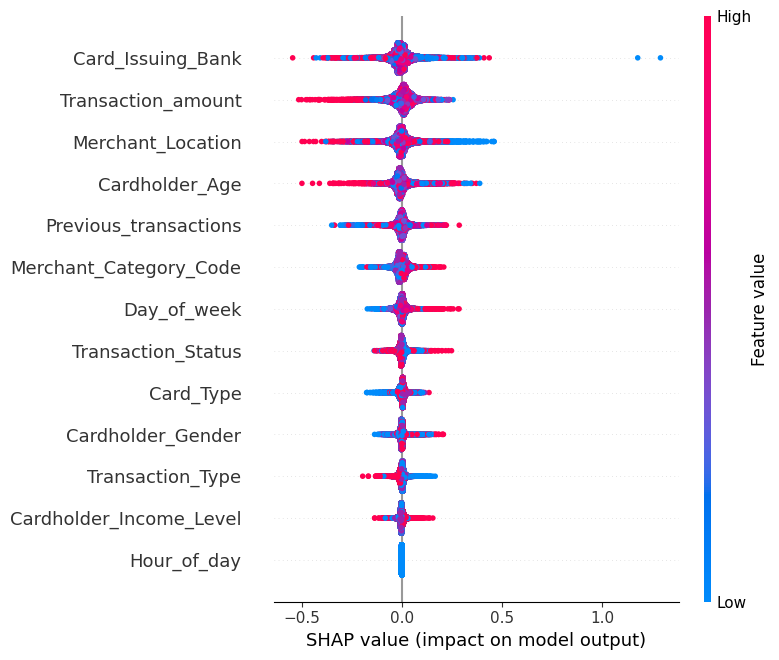

In [15]:


# Explain predictions with SHAP (using LightGBM model here)
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_train)  # X_train should be your training data

# SHAP values might return a list if it's a multi-class classification problem
# For binary classification, shap_values should be a matrix, but for multi-class, it's a list of matrices.
# We'll take the SHAP values for the positive class in case of binary classification:
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Take the SHAP values for the positive class

# Create the SHAP summary plot
shap.summary_plot(shap_values, X_train)

